In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()

In [9]:
x1 = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [33]:
# Standardisation
x2 = StandardScaler().fit_transform(x1)

In [35]:
xe = PCA().fit(x2)

In [37]:
exp = xe.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922, 0.00517871])

In [39]:
import matplotlib.pyplot as plt

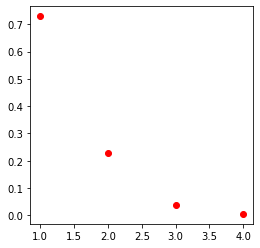

In [40]:
plt.figure(figsize=(4,4))
plt.scatter([1,2,3,4], xe.explained_variance_ratio_, color = 'r')

In [41]:
x = PCA(n_components=3).fit_transform(x2)

In [43]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [50]:
# Using KNN with no bagging
knn_model = KNeighborsClassifier(n_neighbors=5).fit(xtrain, ytrain)

In [52]:
# Using Bagging Technique
bag_model = BaggingClassifier(base_estimator=knn_model, n_estimators=100).fit(xtrain, ytrain)

In [53]:
ypred_knn = knn_model.predict(xtest)
ypred_bag = bag_model.predict(xtest)

In [54]:
cknn = classification_report(ypred_knn, ytest)
cbag = classification_report(ypred_bag, ytest)

In [55]:
print('{}, \n {}'.format(cknn, cbag))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.91      1.00      0.95        10
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30
, 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.73      1.00      0.84         8
           2       1.00      0.79      0.88        14

    accuracy                           0.90        30
   macro avg       0.91      0.93      0.91        30
weighted avg       0.93      0.90      0.90        30

